## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  42.411778   893.388015  0.285890  7.995758  1.362694
1  13.195767   679.669252  0.962208  5.240395  1.561806
2  95.648866   807.705369  0.668462  2.129615  1.373732
3  90.269921  1512.148340  0.495347  9.474535  1.469390
4  86.312083   470.673247  0.088871  1.079842  0.636217


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9398955	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.9314117	total: 68.9ms	remaining: 34.4s
2:	learn: 0.9228940	total: 69.4ms	remaining: 23.1s
3:	learn: 0.9138957	total: 69.8ms	remaining: 17.4s
4:	learn: 0.9053444	total: 70.3ms	remaining: 14s
5:	learn: 0.8972403	total: 70.8ms	remaining: 11.7s
6:	learn: 0.8876893	total: 71.2ms	remaining: 10.1s
7:	learn: 0.8773657	total: 71.6ms	remaining: 8.88s
8:	learn: 0.8674128	total: 72ms	remaining: 7.93s
9:	learn: 0.8575713	total: 72.5ms	remaining: 7.17s
10:	learn: 0.8495068	total: 72.8ms	remaining: 6.55s
11:	learn: 0.8404036	total: 73.3ms	remaining: 6.04s
12:	learn: 0.8335137	total: 73.8ms	remaining: 5.6s
13:	learn: 0.8246614	total: 74.2ms	remaining: 5.22s
14:	learn: 0.8163580	total: 74.6ms	remaining: 4.9s
15:	learn: 0.8079317	total: 75ms	remaining: 4.61s
16:	learn: 0.8006190	total: 75.4ms	remaining: 4.36s
17:	learn: 0.7927072	total: 75.8ms	remaining: 4.14s
18:	learn: 0.7869569	total: 76.4ms	remaining: 3.94s


90:	learn: 0.4223800	total: 109ms	remaining: 1.09s
91:	learn: 0.4189109	total: 109ms	remaining: 1.08s
92:	learn: 0.4157124	total: 110ms	remaining: 1.07s
93:	learn: 0.4127525	total: 110ms	remaining: 1.06s
94:	learn: 0.4095972	total: 110ms	remaining: 1.05s
95:	learn: 0.4065490	total: 111ms	remaining: 1.04s
96:	learn: 0.4037741	total: 111ms	remaining: 1.03s
97:	learn: 0.4010707	total: 112ms	remaining: 1.03s
98:	learn: 0.3980947	total: 112ms	remaining: 1.02s
99:	learn: 0.3951321	total: 113ms	remaining: 1.01s
100:	learn: 0.3920713	total: 113ms	remaining: 1.01s
101:	learn: 0.3894037	total: 114ms	remaining: 1s
102:	learn: 0.3868769	total: 114ms	remaining: 993ms
103:	learn: 0.3845350	total: 114ms	remaining: 986ms
104:	learn: 0.3820758	total: 115ms	remaining: 979ms
105:	learn: 0.3793840	total: 115ms	remaining: 972ms
106:	learn: 0.3767143	total: 116ms	remaining: 966ms
107:	learn: 0.3740708	total: 116ms	remaining: 960ms
108:	learn: 0.3713525	total: 117ms	remaining: 955ms
109:	learn: 0.3680038	tot

274:	learn: 0.1561407	total: 186ms	remaining: 491ms
275:	learn: 0.1558041	total: 187ms	remaining: 490ms
276:	learn: 0.1551956	total: 188ms	remaining: 489ms
277:	learn: 0.1548596	total: 188ms	remaining: 488ms
278:	learn: 0.1542065	total: 188ms	remaining: 487ms
279:	learn: 0.1536650	total: 189ms	remaining: 485ms
280:	learn: 0.1533414	total: 189ms	remaining: 484ms
281:	learn: 0.1526882	total: 189ms	remaining: 482ms
282:	learn: 0.1523715	total: 190ms	remaining: 481ms
283:	learn: 0.1520720	total: 190ms	remaining: 480ms
284:	learn: 0.1517654	total: 191ms	remaining: 479ms
285:	learn: 0.1509934	total: 191ms	remaining: 478ms
286:	learn: 0.1501490	total: 192ms	remaining: 476ms
287:	learn: 0.1494624	total: 192ms	remaining: 475ms
288:	learn: 0.1490764	total: 193ms	remaining: 474ms
289:	learn: 0.1487569	total: 193ms	remaining: 473ms
290:	learn: 0.1484643	total: 194ms	remaining: 472ms
291:	learn: 0.1481765	total: 194ms	remaining: 470ms
292:	learn: 0.1474963	total: 194ms	remaining: 469ms
293:	learn: 

510:	learn: 0.0827928	total: 291ms	remaining: 278ms
511:	learn: 0.0826798	total: 291ms	remaining: 278ms
512:	learn: 0.0826417	total: 292ms	remaining: 277ms
513:	learn: 0.0822062	total: 292ms	remaining: 276ms
514:	learn: 0.0818122	total: 293ms	remaining: 276ms
515:	learn: 0.0817020	total: 293ms	remaining: 275ms
516:	learn: 0.0815949	total: 294ms	remaining: 274ms
517:	learn: 0.0812072	total: 294ms	remaining: 274ms
518:	learn: 0.0811593	total: 294ms	remaining: 273ms
519:	learn: 0.0808534	total: 295ms	remaining: 272ms
520:	learn: 0.0804756	total: 295ms	remaining: 271ms
521:	learn: 0.0803776	total: 296ms	remaining: 271ms
522:	learn: 0.0803408	total: 296ms	remaining: 270ms
523:	learn: 0.0800460	total: 296ms	remaining: 269ms
524:	learn: 0.0796782	total: 297ms	remaining: 268ms
525:	learn: 0.0795830	total: 297ms	remaining: 268ms
526:	learn: 0.0795269	total: 297ms	remaining: 267ms
527:	learn: 0.0794334	total: 298ms	remaining: 266ms
528:	learn: 0.0790831	total: 298ms	remaining: 265ms
529:	learn: 

689:	learn: 0.0480185	total: 369ms	remaining: 166ms
690:	learn: 0.0478881	total: 370ms	remaining: 165ms
691:	learn: 0.0478448	total: 370ms	remaining: 165ms
692:	learn: 0.0477182	total: 371ms	remaining: 164ms
693:	learn: 0.0475899	total: 371ms	remaining: 164ms
694:	learn: 0.0474777	total: 371ms	remaining: 163ms
695:	learn: 0.0473911	total: 372ms	remaining: 162ms
696:	learn: 0.0473488	total: 372ms	remaining: 162ms
697:	learn: 0.0471258	total: 373ms	remaining: 161ms
698:	learn: 0.0470843	total: 373ms	remaining: 161ms
699:	learn: 0.0470434	total: 374ms	remaining: 160ms
700:	learn: 0.0469179	total: 374ms	remaining: 160ms
701:	learn: 0.0468329	total: 375ms	remaining: 159ms
702:	learn: 0.0467496	total: 375ms	remaining: 159ms
703:	learn: 0.0465504	total: 376ms	remaining: 158ms
704:	learn: 0.0465101	total: 376ms	remaining: 157ms
705:	learn: 0.0464588	total: 377ms	remaining: 157ms
706:	learn: 0.0463363	total: 377ms	remaining: 156ms
707:	learn: 0.0462545	total: 378ms	remaining: 156ms
708:	learn: 

925:	learn: 0.0266883	total: 473ms	remaining: 37.8ms
926:	learn: 0.0266518	total: 474ms	remaining: 37.3ms
927:	learn: 0.0265437	total: 474ms	remaining: 36.8ms
928:	learn: 0.0265078	total: 475ms	remaining: 36.3ms
929:	learn: 0.0264285	total: 475ms	remaining: 35.8ms
930:	learn: 0.0263471	total: 475ms	remaining: 35.2ms
931:	learn: 0.0263119	total: 476ms	remaining: 34.7ms
932:	learn: 0.0262395	total: 476ms	remaining: 34.2ms
933:	learn: 0.0261615	total: 477ms	remaining: 33.7ms
934:	learn: 0.0260823	total: 477ms	remaining: 33.2ms
935:	learn: 0.0260031	total: 478ms	remaining: 32.7ms
936:	learn: 0.0259264	total: 478ms	remaining: 32.1ms
937:	learn: 0.0258488	total: 478ms	remaining: 31.6ms
938:	learn: 0.0257729	total: 479ms	remaining: 31.1ms
939:	learn: 0.0257268	total: 479ms	remaining: 30.6ms
940:	learn: 0.0256815	total: 480ms	remaining: 30.1ms
941:	learn: 0.0256523	total: 480ms	remaining: 29.6ms
942:	learn: 0.0255769	total: 481ms	remaining: 29.1ms
943:	learn: 0.0255480	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

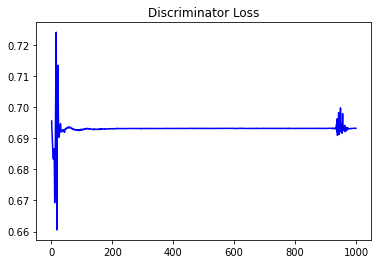

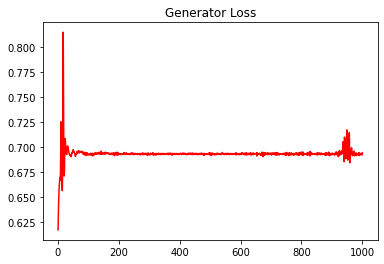

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7136182903690595


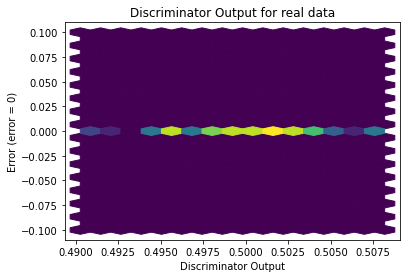

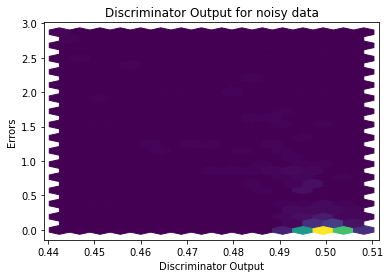

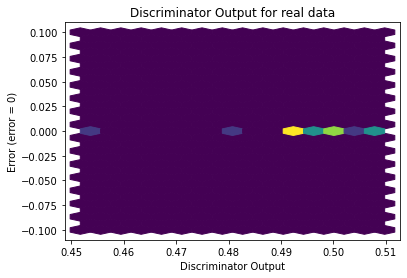

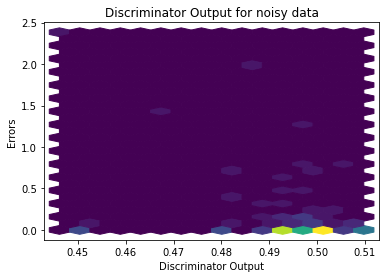

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


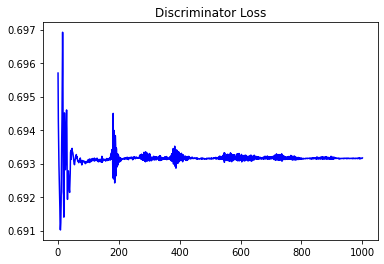

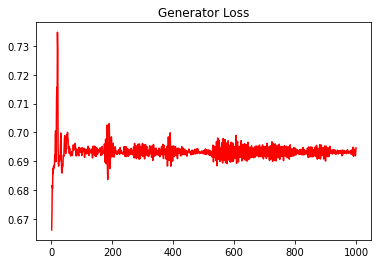

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7335566113420349


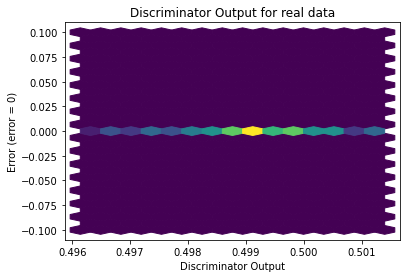

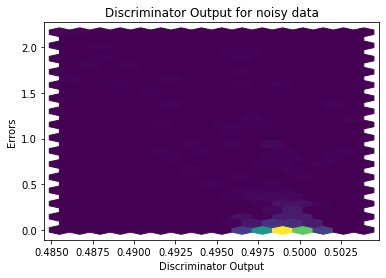

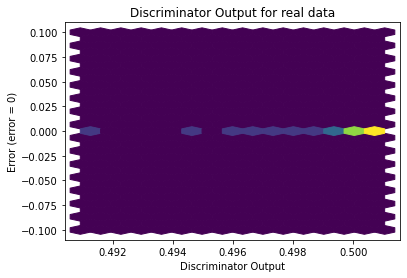

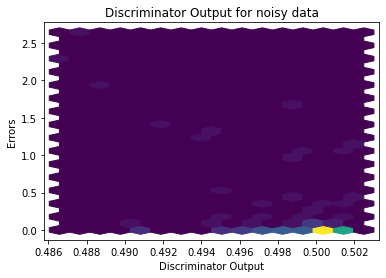

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1514]], requires_grad=True)
